<a href="https://colab.research.google.com/github/jcanofuentes/ML_Notebook/blob/main/1_NN_desde_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x:  (500, 2)
y:  (500,)
y:  (500, 1)


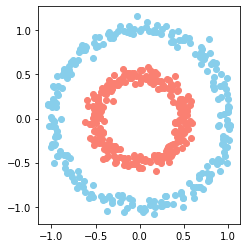

In [ ]:
import numpy as np
import scipy as sc

from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Creamos el dataset
n = 500
p = 2

# X será un vector de 2 columnas (x,y) x 500 filas
# Y será un vector de 1 columna (clase) x 500 filas
X,Y =make_circles(n_samples=n, factor=0.5, noise=0.05)

print("x: ", X.shape)
print("y: ", Y.shape) 

# En el caso de la Y tenemos un shape -incorrecto- de (500,)
# Es así porque ha devuelto una serie (en lugar de una matriz columna)
# Le damos formato copiando lo anterior y añadiendo una dimensión
Y = Y[:,np.newaxis]
print("y: ", Y.shape) 

#plt.scatter(X[:,0],X[:,1])
#plt.scatter(X[:,0],X[:,1])

#plt.scatter(X[Y==0,0],X[Y==0,1],c="skyblue")
#plt.scatter(X[Y==1,0],X[Y==1,1],c="salmon")

plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c="skyblue")
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon")

plt.gca().set_aspect('equal')
plt.show()


In [ ]:
class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
      self.act_f = act_f
      self.b = np.random.rand(1, n_neur) * 2 - 1
      self.W = np.random.rand(n_conn, n_neur) * 2 - 1
     

Este ejercicio está basado en el vídeo de **DOTCSV: IA NOTEBOOK #4 | Programando Red Neuronal desde Cero!**

https://www.youtube.com/watch?v=W8AeOXa_FqU
Vamos a definir las funciones de activación. Por esta función pasa la suma ponderada que pasa por la neurona. De esta forma se añade no-linealidad: nos permite combinar muchas neuronas sin que se reduzca a una única f. lineal.

y= w1*x1 + w2*x2 + b

Tenemos diferentes tipos como sigmoide, RELU, tangencial hiperbólica, etc. 

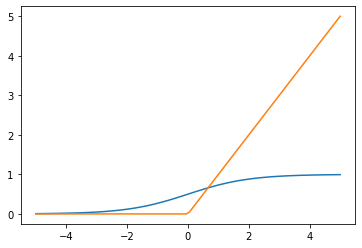

In [ ]:
# Implementamos con funciones anónimas (lambda)
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))
relu = lambda x: np.maximum(0,x)

# Visualicemos estas funciones:
_x = np.linspace(-5,5,100)
plt.plot(_x, sigm[0](_x))
plt.plot(_x, relu(_x))

In [ ]:
def create_nn(topology, act_f):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l],topology[l+1],act_f))
  return nn

In [ ]:
#topology = [p,4,8,16,8,4,1]
topology = [p,4,8,1]
neural_net = create_nn(topology, sigm)


1. **Forward pass** (entramos con un tipo de dato y sacamos un valor de salida)
2. Una vez tenemos un resultado, calculamos el **error** comparando la salida con el dato real mediante la **función de coste**
3. Propagación hacia atrás: calculamos derivadas parciales mediante **back-propagation**. Nos permiten obtener la información necesaria para ejecutar el algoritmo del **descenso del gradiente**. Así optimizamos la función de coste

In [ ]:
l2_cost = (lambda Ypredicha, Yreal: np.mean(( Ypredicha - Yreal) ** 2),
           lambda Ypredicha, Yreal: (Ypredicha - Yreal))

def train( neural_net, X, Y, l2_cost, lrate=0.5, train=True):
  
  #Almacenamos tuplas de valores: suma y activación
  #out = [ (z0,a0), (z1,a1), ... ]
  out = [(None,X)]

  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b # Suma ponderada
    a = neural_net[l].act_f[0](z) # Activación
    out.append((z,a))

  # print(out[-1][1])
  # print(l2_cost[0](out[-1][1],Y))

  if train:
    # Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1] 

      if (l == len(neural_net) - 1):
        # Calcular delta última capa: con la derivada de la función de
        # coste y la derivada de la función de activación en la última capa
        f_prima_l2_cost = l2_cost[1](a,Y)
        f_prima_act_f = neural_net[l].act_f[1](a)
        deltaL = f_prima_l2_cost * f_prima_act_f
        deltas.insert(0,deltaL)
      else:
        # Calcular delta respecto a capa previa
        deltas.insert(0,deltas[0] @ _W.T * neural_net[1].act_f[1](a))

      _W = neural_net[l].W

      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lrate 

      # Ojo: tenemos que almacenar el valor para no estar optimizando y utilizando el mismo valor
      # Para ello usamos _W
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lrate
    
  return out[-1][1]

train(neural_net,X,Y,l2_cost,0.5)

array([[0.58175447],
       [0.5783702 ],
       [0.56461492],
       [0.56560217],
       [0.58470742],
       [0.58159672],
       [0.56324218],
       [0.58257598],
       [0.57355997],
       [0.56714171],
       [0.56308901],
       [0.57629861],
       [0.57903787],
       [0.57075305],
       [0.5786164 ],
       [0.56335148],
       [0.56777462],
       [0.5764076 ],
       [0.58367186],
       [0.56912537],
       [0.56328979],
       [0.57172447],
       [0.56837513],
       [0.57919774],
       [0.57406566],
       [0.5743774 ],
       [0.56165339],
       [0.5807615 ],
       [0.56553388],
       [0.57846465],
       [0.57749439],
       [0.58225861],
       [0.57100759],
       [0.57909641],
       [0.57295152],
       [0.57240173],
       [0.5787594 ],
       [0.57388118],
       [0.5823455 ],
       [0.57340699],
       [0.56083115],
       [0.5729088 ],
       [0.57935413],
       [0.57284798],
       [0.57961998],
       [0.57239961],
       [0.57149079],
       [0.568

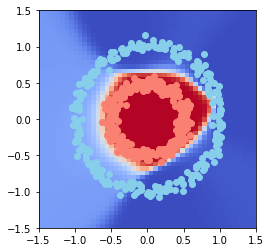

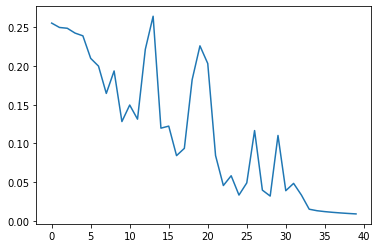

In [ ]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(1000):
  # Entrenamos a la red!
  pY = train(neural_n, X, Y, l2_cost, lrate=0.2)

  if i%25 == 0:
    loss.append(l2_cost[0](pY, Y))  # Calculamos el coste
    
    #Crearemos una malla de 50x50 para visualizar el resultado
    res = 50 
    _x0 = np.linspace(-1.5,1.5,res)
    _x1 = np.linspace(-1.5,1.5,res)

    _Y = np.zeros((res, res))
    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    # Update de la malla
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.gca().set_aspect('equal')
    plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c="skyblue")
    plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon")
    # Fin update de la malla

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)


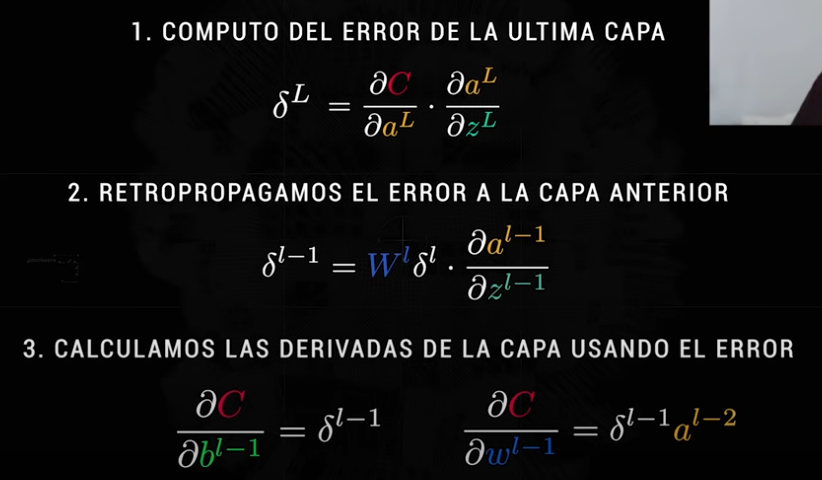

**Pendientes**
*   Estudiar funciones lambda
*   Revisar valores de salida en la activación
*   Revisar la propagación de errores ¿cómo pasamos de la forma de derivdas parciales a laimplementación?
*   Revisar la necesidad de transpuestas

**Refs.**
https://towardsdatascience.com/backpropagation-for-people-who-are-afraid-of-math-936a2cbebed7

https://numpy.org/doc/1.16/reference/routines.random.html
https://python-para-impacientes.blogspot.com/2019/11/estructura-de-un-array-numpy.html
